In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
import pandas as pd
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
"""
Choose the training data set to be trained on.
"""
dataset = 1

if dataset==1:
    # Training Data set with 10e6 data points for gamma = 0.37, delta = 0.3
    X_train = np.array(pd.read_csv("X_train_mac_lots.csv", header=0, index_col=0))
    y_train = pd.read_csv("y_train_mac_lots.csv", header=0, index_col=0)
    X_test = np.array(pd.read_csv("X_test_mac_lots.csv", header=0, index_col=0))
    y_test = pd.read_csv("y_test_mac_lots.csv", header=0, index_col=0)
elif dataset==2:
    # Training Data set with 10e5 data points for gamma = 0.37, delta = 1
    X_train = np.array(pd.read_csv("X_train_delta1.csv", header=0, index_col=0))
    y_train = pd.read_csv("y_train_delta1.csv", header=0, index_col=0)
    X_test = np.array(pd.read_csv("X_test_delta1.csv", header=0, index_col=0))
    y_test = pd.read_csv("y_test_delta1.csv", header=0, index_col=0)

D:\Anaconda\envs\XAI\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = pd.DataFrame(scaler.transform(X_train), columns=['x0','v0','t'])
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=['x0','v0','t'])

In [63]:
# set up and train the network
input_shape = np.shape(X_train)[1]#, 1)
#opt = RMSprop()
opt = Adam(learning_rate=0.001, beta_1=0.7)

model = Sequential()
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100),tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]
model.add(layers.Flatten())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='relu'))
"""
Try LSTM Next: need to do some data preprocessing
model.add(layers.LSTM(128))
model.add(layers.Embedding(input_dim=input_shape, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))
"""
model.add(layers.Dense(2))
loss='mse'
model.compile(optimizer=opt, loss=loss)
history=model.fit(X_train_scale, y_train, steps_per_epoch=None, epochs=5000, validation_split=0.2, batch_size=5096, shuffle=True, callbacks=callbacks, verbose=1)

Epoch 1/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.3819 - val_loss: 0.3683
Epoch 2/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.3345 - val_loss: 0.3180
Epoch 3/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.3129 - val_loss: 0.3036
Epoch 4/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.3003 - val_loss: 0.2943
Epoch 5/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2913 - val_loss: 0.2900
Epoch 6/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.2839 - val_loss: 0.2770
Epoch 7/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.2776 - val_loss: 0.2741
Epoch 8/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.2728 - val_loss: 0.2680
Epoch 9/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.2687 - val_loss: 0.2638
Epoch 10/5000
1570/1570 [==============================] - 

Epoch 79/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2023 - val_loss: 0.2030
Epoch 80/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2022 - val_loss: 0.2007
Epoch 81/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2019 - val_loss: 0.2017
Epoch 82/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2017 - val_loss: 0.2018
Epoch 83/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2014 - val_loss: 0.1989
Epoch 84/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2012 - val_loss: 0.2009
Epoch 85/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2008 - val_loss: 0.2024
Epoch 86/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2008 - val_loss: 0.2011
Epoch 87/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.2005 - val_loss: 0.1993
Epoch 88/5000
1570/1570 [==============================

1570/1570 [==============================] - 9s 6ms/step - loss: 0.1906 - val_loss: 0.1908
Epoch 157/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1906 - val_loss: 0.1964
Epoch 158/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1905 - val_loss: 0.1896
Epoch 159/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1904 - val_loss: 0.1903
Epoch 160/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1902 - val_loss: 0.1909
Epoch 161/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.1903 - val_loss: 0.1931
Epoch 162/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.1901 - val_loss: 0.1894
Epoch 163/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.1901 - val_loss: 0.1915
Epoch 164/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1900 - val_loss: 0.1902
Epoch 165/5000
1570/1570 [==============================] 

1570/1570 [==============================] - 9s 6ms/step - loss: 0.1856 - val_loss: 0.1858
Epoch 234/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1857 - val_loss: 0.1860
Epoch 235/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1855 - val_loss: 0.1867
Epoch 236/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1855 - val_loss: 0.1873
Epoch 237/5000
1570/1570 [==============================] - 10s 6ms/step - loss: 0.1855 - val_loss: 0.1873
Epoch 238/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1855 - val_loss: 0.1845
Epoch 239/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1853 - val_loss: 0.1858
Epoch 240/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1854 - val_loss: 0.1882
Epoch 241/5000
1570/1570 [==============================] - 9s 6ms/step - loss: 0.1853 - val_loss: 0.1867
Epoch 242/5000
1570/1570 [==============================] - 

In [64]:
# evaluate the fitting validation and training losses
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

## Make Prdictions on the Test Dataset
y_pred = pd.DataFrame(model.predict(X_test_scale), columns=['xt','vt'])



In [65]:
pred_norm = np.linalg.norm(y_pred[['xt','vt']].values,axis=1)
true_norm = np.linalg.norm(y_test[['xt','vt']].values,axis=1)
hist_data = np.abs(pred_norm-true_norm)/np.abs(true_norm)
hist_data = pd.DataFrame(hist_data, columns=['norm'])
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.00)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1
    trueList = ~((df > (Q3 + 1.5 * IQR)))
    #trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

indices = Remove_Outlier_Indices(hist_data)
hist_data = hist_data[indices]

You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


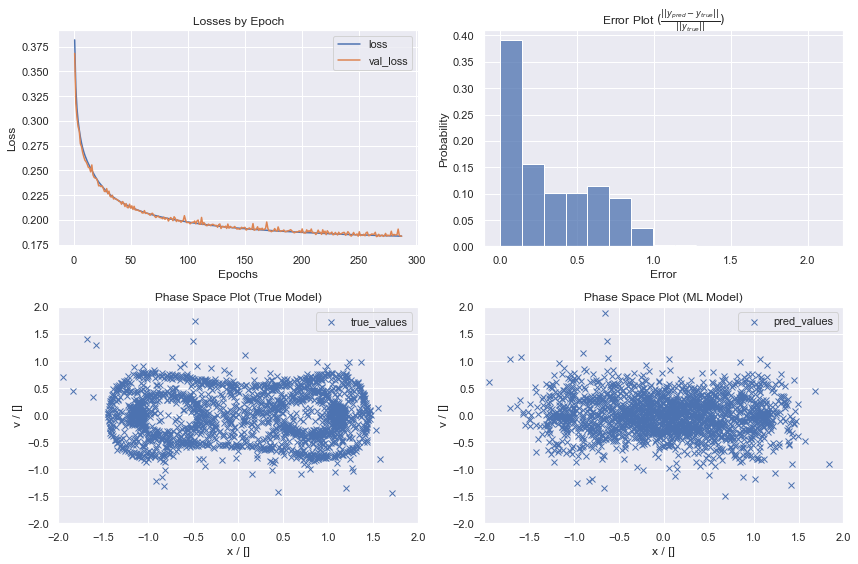

In [79]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))

sns.lineplot(data = history.history, x = epochs, y='loss',ax=axs[0,0], label='loss')
sns.lineplot(data = history.history, x = epochs, y='val_loss',ax=axs[0,0], label='val_loss')

axs[0,0].set_xlabel('Epochs')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title("Losses by Epoch")
axs[0,0].legend()



sns.scatterplot(data = y_test.iloc[:2000,:], x = 'xt', y='vt',ax=axs[1,0],label='true_values', marker='x', linewidth = 1)

axs[1,0].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,0].set_xlabel('x / []')
axs[1,0].set_ylabel('v / []')
axs[1,0].set_title("Phase Space Plot (True Model)")


sns.scatterplot(data = y_pred.iloc[:2000,:], x='xt', y='vt',ax=axs[1,1],label='pred_values',  marker='x', linewidth = 1)

axs[1,1].set(xlim=(-2, 2), ylim=(-2, 2))
axs[1,1].set_xlabel('x / []')
axs[1,1].set_ylabel('v / []')
axs[1,1].set_title("Phase Space Plot (ML Model)")


sns.histplot(data=hist_data, x = 'norm', kde=False, stat='probability', bins=15, ax=axs[0,1])

axs[0,1].set_xlabel('Error')
axs[0,1].set_ylabel('Probability')
axs[0,1].set_title(r"Error Plot $(\frac{||y_{pred}-y_{true}||}{||y_{true}||})$")



f.tight_layout()

f.savefig("ml_simplest.svg", dpi='figure')

In [67]:
class TrueModel():
    def __init__(self, scaler):
        self.alpha=-1
        self.beta=1
        self.delta=0.3
        self.gamma=0.37
        self.omega=1.2
        self.scaler = scaler
        
    def inv_transform(self, X):
        return pd.DataFrame(self.scaler.inverse_transform(X), columns=['x0','v0','t'])
       
    def eom(self, u, t):
        x, dx = u[0], u[1]
        ddx= self.gamma * np.cos(self.omega * t) - (self.delta * dx + self.alpha*x + self.beta * x**3)
        return [dx,ddx]
    
    def predict(self, X):
        X = self.inv_transform(X)
        X_res = np.ones((np.shape(X)[0], 2))
        for i in range(0,np.shape(X)[0]):
            t_range = np.linspace(0, X['t'].iloc[i], 500, endpoint=False)
            X_res[i,:] = odeint(self.eom, [X['x0'].iloc[i],X['v0'].iloc[i]], t_range)[-1]
            
        return X_res


In [68]:
true_model = TrueModel(scaler)


In [69]:
import shap

background = X_train_scale.iloc[np.random.choice(X_train_scale.shape[0], 100, replace=False)]

true_explainer = shap.explainers.Permutation(true_model.predict, background)
explainer = shap.explainers.Permutation(model.predict, background)

In [70]:
true_values = true_explainer(X_test_scale.iloc[:100,:])
model_values = explainer(X_test_scale.iloc[:100,:])

Permutation explainer: 101it [33:56, 20.36s/it]                         
Permutation explainer: 101it [00:35,  2.05it/s]                         


In [71]:

print("shap_values =", true_values.values)




print("shap_values =", model_values.values)


shap_values = [[[-2.51833627e-01 -7.29079356e-02]
  [-2.42237479e-01 -3.62229431e-02]
  [-6.81894899e-01 -7.77944618e-02]]

 [[ 1.87947261e-01  1.91772644e-01]
  [ 1.73574669e-01  2.70804872e-01]
  [ 2.02026172e-01 -6.48018028e-02]]

 [[ 1.16827772e-01  1.32457828e-01]
  [-8.48156769e-03  1.57737935e-01]
  [ 9.78508094e-02  3.16152211e-01]]

 [[ 4.22409936e-01 -2.55373347e-01]
  [ 1.12317968e-01 -1.87846052e-01]
  [ 3.56842553e-01 -1.94389404e-01]]

 [[-2.62895086e-01  1.19393237e-01]
  [ 1.71860411e-01  1.58750800e-01]
  [ 2.57211884e-01 -1.96098291e-01]]

 [[-1.79631400e-01 -1.17450687e-01]
  [-2.06049763e-01 -2.59557397e-01]
  [-5.41534916e-01 -1.29172835e-01]]

 [[-6.84255256e-01  1.03205949e-01]
  [-1.64452472e-01  8.03684970e-02]
  [-3.04070480e-01  4.51752777e-01]]

 [[-1.25786274e-01 -1.58733823e-01]
  [-3.78525875e-01 -7.30742606e-02]
  [-1.59032942e-01 -2.52479334e-01]]

 [[ 4.76556999e-02 -1.31241543e-01]
  [ 3.58833303e-01 -2.49247239e-01]
  [ 6.32228173e-01 -4.14617860e-01

In [72]:
true_explainer_partition = shap.explainers.Partition(true_model.predict, background)
explainer_partition = shap.explainers.Partition(model.predict, background)

In [73]:
true_values_partition = true_explainer_partition(X_test_scale.iloc[:100,:])
model_values_partition = explainer_partition(X_test_scale.iloc[:100,:])

Partition explainer: 101it [04:36,  2.85s/it]                         
Partition explainer: 101it [00:13,  1.77it/s]                         


In [74]:
true_plotting_data = np.empty((len(true_values.values),6))
plotting_data = np.empty((len(true_values.values),6))

for i in range(len(true_values.values)):
    true_plotting_data[i,:] = true_values_partition.values[i].flatten()
    plotting_data[i,:] = model_values_partition.values[i].flatten()
    
true_plot_data = pd.DataFrame(true_plotting_data, columns = ['x0_xt', 'v0_xt', 't_xt', 'x0_vt', 'v0_vt', 't_vt'])
plot_data = pd.DataFrame(plotting_data, columns = ['x0_xt', 'v0_xt', 't_xt', 'x0_vt', 'v0_vt', 't_vt'])

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_16 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 32)               

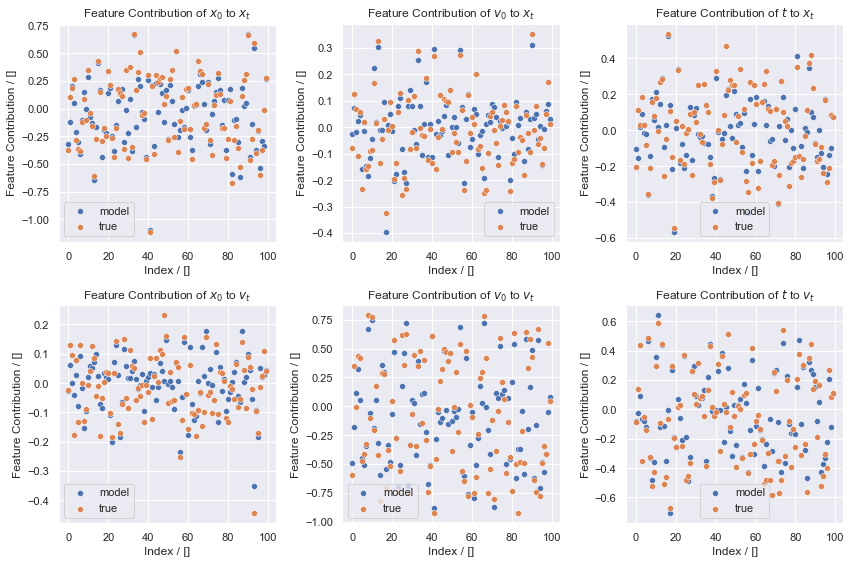

In [81]:
f, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4, 4]))



sns.scatterplot(data = plot_data, x = plot_data.index,  y='x0_xt', label = 'model', ax=axs[0,0])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='x0_xt', label='true',ax=axs[0,0])
axs[0,0].set_title(r"Feature Contribution of $x_0$ to $x_t$")
axs[0,0].set_xlabel('Index / []')
axs[0,0].set_ylabel('Feature Contribution / []')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='v0_xt', label = 'model', ax=axs[0,1])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='v0_xt', label='true',ax=axs[0,1])
axs[0,1].set_title(r"Feature Contribution of $v_0$ to $x_t$")
axs[0,1].set_xlabel('Index / []')
axs[0,1].set_ylabel('Feature Contribution / []')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='t_xt', label = 'model', ax=axs[0,2])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='t_xt', label='true',ax=axs[0,2])
axs[0,2].set_title(r"Feature Contribution of $t$ to $x_t$")
axs[0,2].set_xlabel('Index / []')
axs[0,2].set_ylabel('Feature Contribution / []')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='x0_vt', label = 'model', ax=axs[1,0])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='x0_vt', label='true',ax=axs[1,0])
axs[1,0].set_title(r"Feature Contribution of $x_0$ to $v_t$")
axs[1,0].set_xlabel('Index / []')
axs[1,0].set_ylabel('Feature Contribution / []')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='v0_vt', label = 'model', ax=axs[1,1])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='v0_vt', label='true',ax=axs[1,1])
axs[1,1].set_title(r"Feature Contribution of $v_0$ to $v_t$")
axs[1,1].set_xlabel('Index / []')
axs[1,1].set_ylabel('Feature Contribution / []')

sns.scatterplot(data = plot_data, x = plot_data.index,  y='t_vt', label = 'model', ax=axs[1,2])
sns.scatterplot(data = true_plot_data, x = true_plot_data.index,  y='t_vt', label='true',ax=axs[1,2])
axs[1,2].set_title(r"Feature Contribution of $t$ to $v_t$")
axs[1,2].set_xlabel('Index / []')
axs[1,2].set_ylabel('Feature Contribution / []')


f.tight_layout()


f.savefig("explainability_simplest.svg", dpi='figure')

In [18]:
import lime
import lime.lime_tabular

In [19]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train_scale), verbose=True, mode='regression')

In [60]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


In [54]:


i = 25
lime_exp_model = lime_explainer.explain_instance(X_test_scale.iloc[i], model.predict, num_features=3)
lime_exp_true = lime_explainer.explain_instance(X_test_scale.iloc[i], true_model.predict, num_features=3)


Intercept 0.003112493547155166
Prediction_local [0.05264935]
Right: 0.056869514
Intercept -0.03861950748888254
Prediction_local [0.03383207]
Right: 0.8615930791572571


In [55]:
true_explainer(X_test_scale.iloc[i:i+1,:]).values

Permutation explainer: 2it [00:20, 20.82s/it]               


array([[[ 0.10129852, -0.10535962],
        [ 0.28257871, -0.25726185],
        [ 0.42609764, -0.47286791]]])

In [56]:
explainer(X_test_scale.iloc[i:i+1,:])

.values =
array([[[ 0.03129608, -0.05837571],
        [-0.12947318,  0.01602066],
        [ 0.11330283, -0.27487793]]])

.base_values =
array([[ 0.04174376, -0.00897227]])

.data =
array([[ 0.55628377, -1.37531385,  0.25337406]])

In [57]:
lime_exp_model.show_in_notebook(show_table=True)

In [58]:
lime_exp_true.show_in_notebook(show_table=True)

In [25]:
X_test_scale.iloc[i]

x0    0.556284
v0   -1.375314
t     0.253374
Name: 25, dtype: float64

In [26]:
y_test.iloc[i]

xt    0.814063
vt   -0.826737
Name: 25, dtype: float64

In [27]:
model.predict(X_test_scale.iloc[i-1:i,:])

array([[-0.91385967,  0.7105726 ]], dtype=float32)

In [28]:
i =14
y_test.iloc[i-1:i,:]

print(model.predict(X_test_scale.iloc[i-1:i,:]))
print(true_model.predict(X_test_scale.iloc[i-1:i,:]))

[[-0.6569018  0.855248 ]]
[[-0.64934156  0.89666478]]


In [29]:
y_test.iloc[i-1:i,:]

,xt,vt
13,-0.647907,0.895973


In [30]:
X_test[i-1:i,:]

array([[-1.38792146,  0.70014427,  0.8       ]])

In [31]:
scaler.inverse_transform(X_test_scale.iloc[i:i+1,:])

array([[-0.11061691,  0.16235259, 24.4       ]])

In [32]:
X_test[i-1]

array([-1.38792146,  0.70014427,  0.8       ])

In [33]:
X_test_scale.iloc[i-1:i,:]

,x0,v0,t
13,-1.202287,1.21308,-1.67265


In [34]:
[X_test_scale['x0'].iloc[i-1],X_test_scale['v0'].iloc[i-1]]

[-1.2022865601619392, 1.2130795650650257]